In [1]:
import sys
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import normalize
import os
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

In [2]:
from crop import *

img_path='./OCT2017_/train/NORMAL/'
new_model = tf.keras.models.load_model('./retina_segmentation_8_layer.hdf5')

In [3]:
SIZE_X = 640
SIZE_Y = 640
im_vec=load_image(img_path,(SIZE_Y,SIZE_X))

im_vec=np.array(im_vec)
idx=np.random.choice(len(im_vec),1000,replace=False)
sampled_vec=im_vec[idx]

100%|██████████| 26315/26315 [00:55<00:00, 474.91it/s]


In [5]:
im_vec=None
reconstruct=crop(sampled_vec,model=new_model)
sampled_vec=None

Fitting on Images for optimal crop
32/32 [==============================] - 135s 4s/step


In [6]:
w=reconstruct[0].shape[0]
h=reconstruct[0].shape[1]

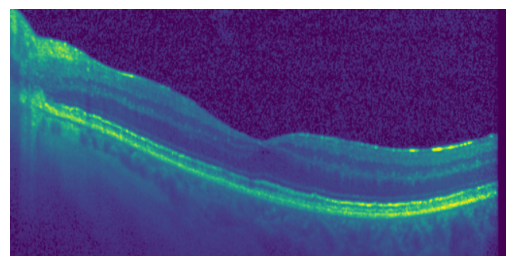

In [9]:
plt.axis('off')

spec = plt.imshow(reconstruct[0])

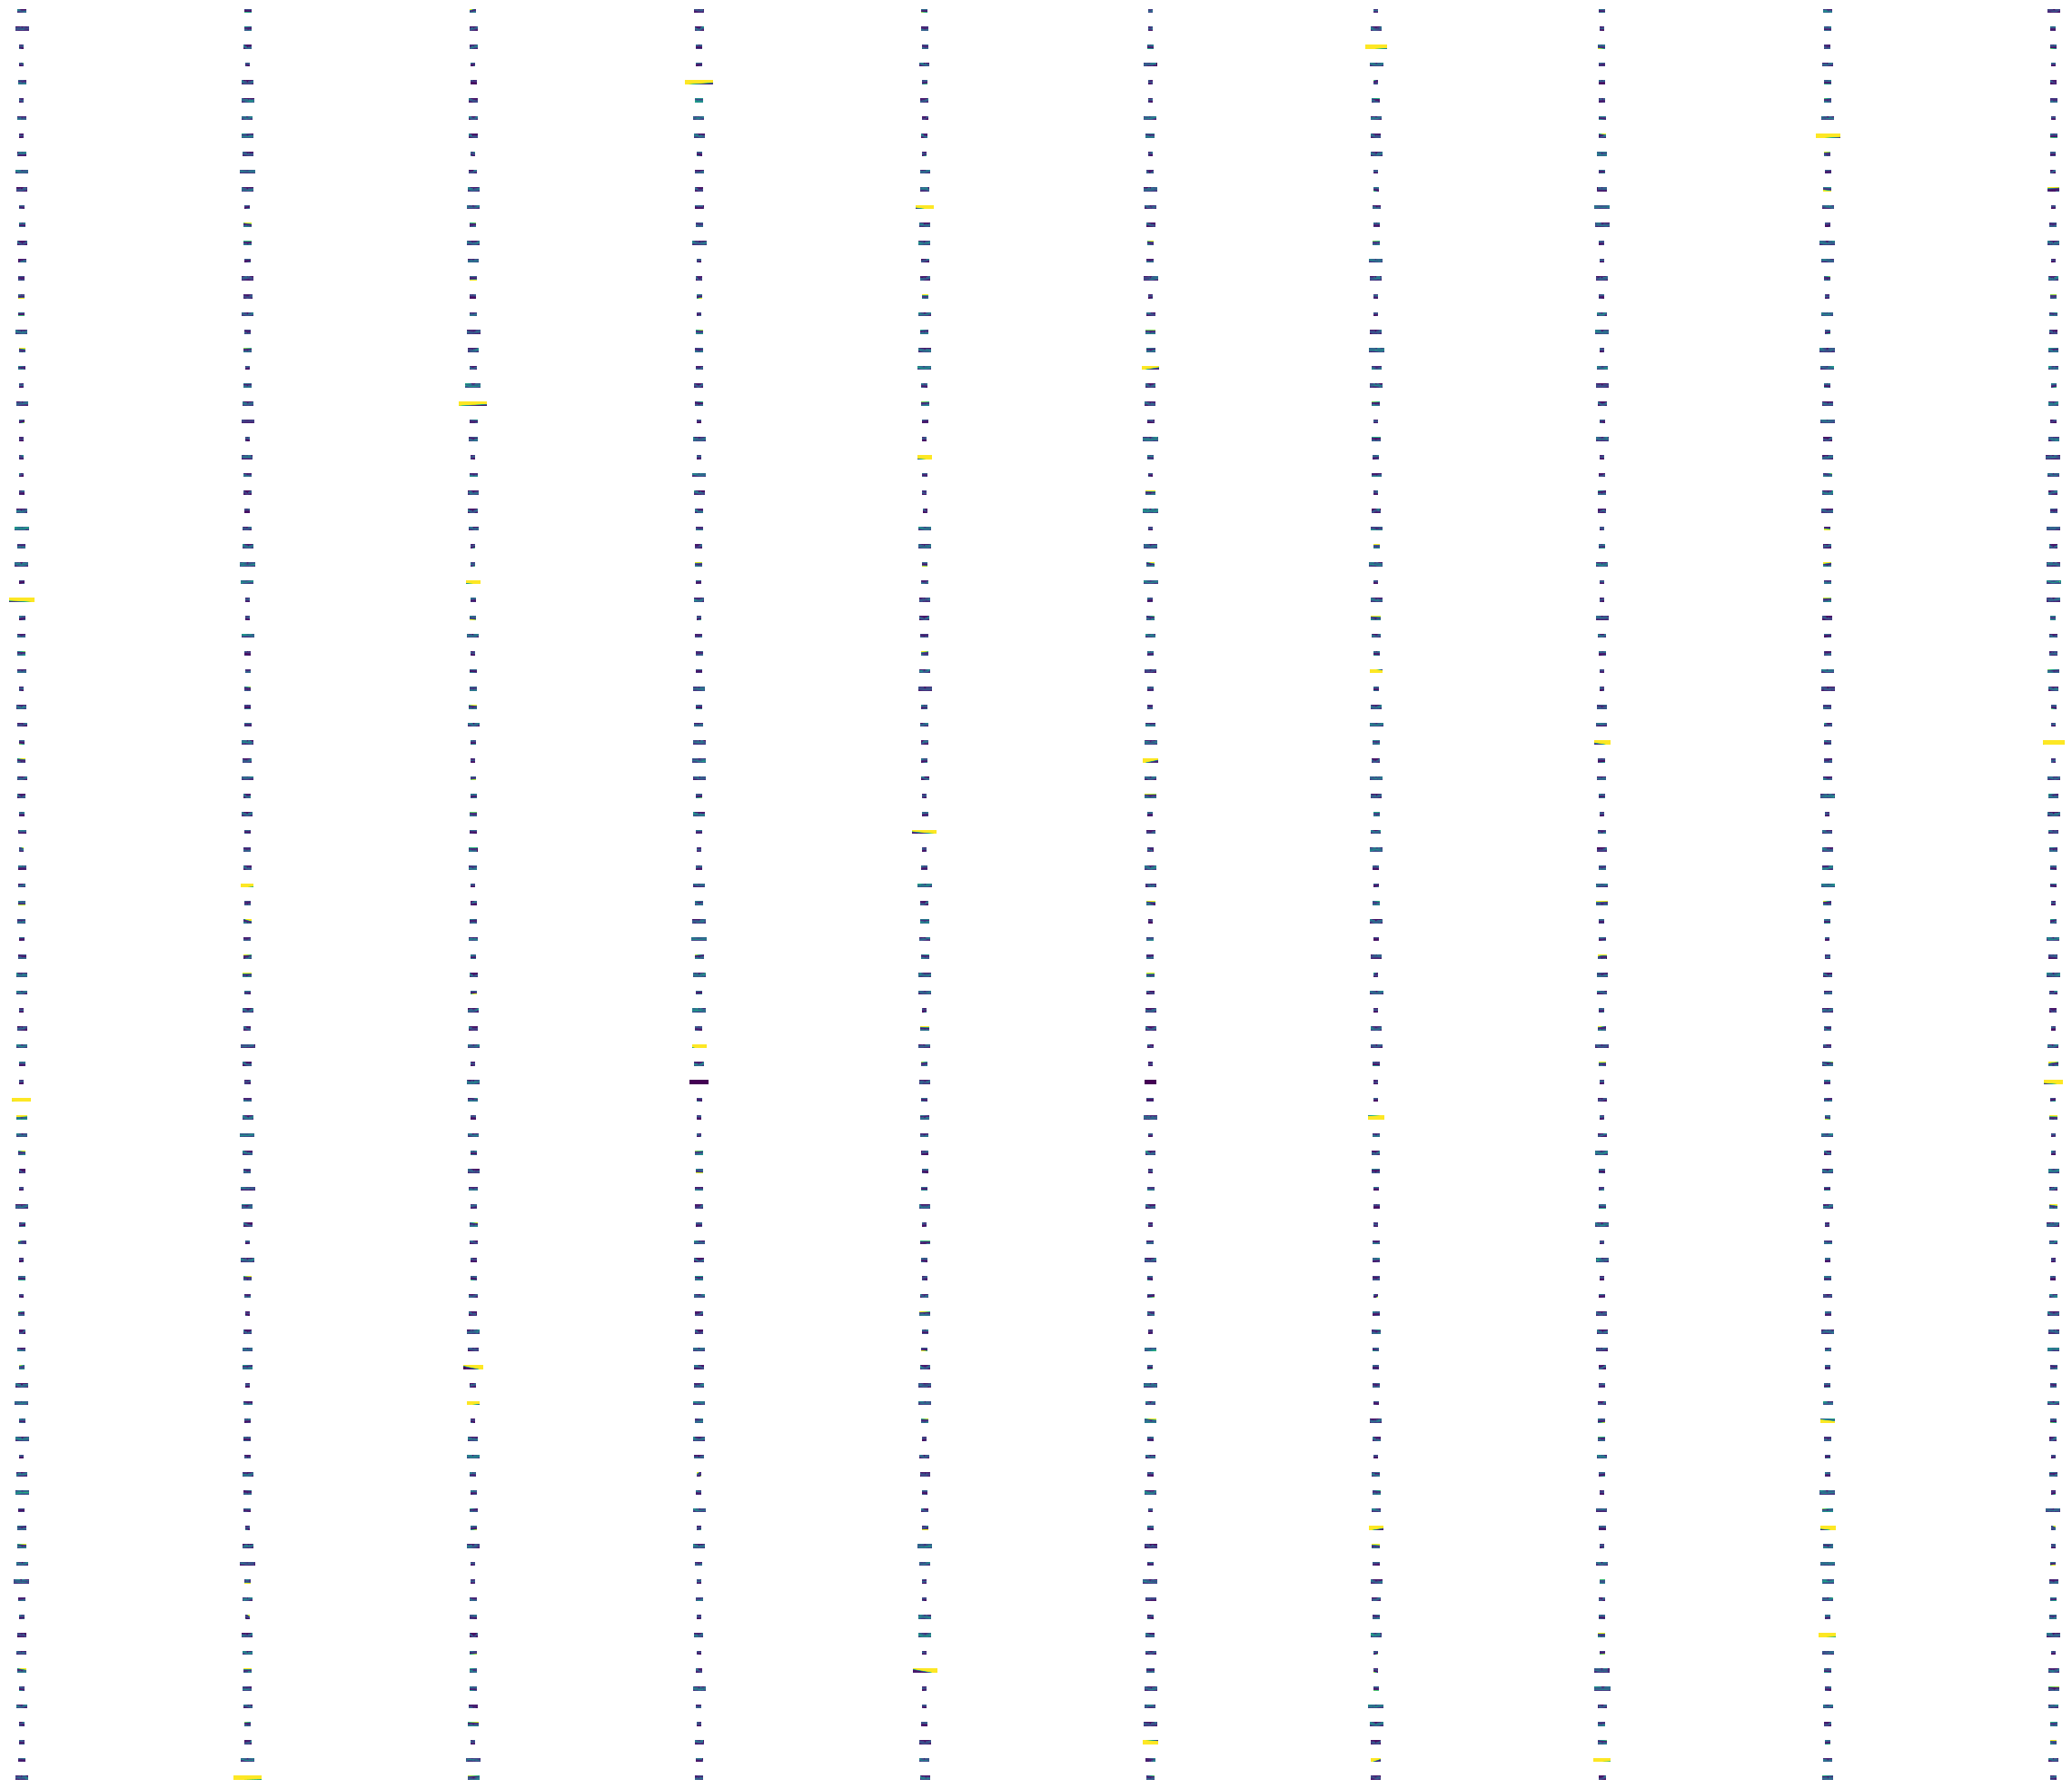

In [8]:
fig=plt.figure(figsize=(25,20))

for i in range(len(reconstruct)):
    ax = plt.subplot(len(reconstruct)//10+1,10,i+1)
    ax.imshow(reconstruct[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
SIZE_X = 640
SIZE_Y = 640
im_vec=load_image(img_path,(SIZE_Y,SIZE_X))

img_path='./OCT2017_/train/DRUSEN'
new_model = tf.keras.models.load_model('./retina_segmentation_8_layer.hdf5')

im_vec=np.array(im_vec)
idx=np.random.choice(len(im_vec),300,replace=False)
sampled_vec=im_vec[idx]

im_vec=None
reconstruct=crop(sampled_vec,is_normal=False,model=new_model)
sampled_vec=None

100%|██████████| 26315/26315 [01:03<00:00, 411.99it/s]


Fitting on Images for optimal crop
10/10 [==============================] - 69s 7s/step


In [ ]:
# https://www.kaggle.com/datasets/paultimothymooney/kermany2018?datasetId=17839&sortBy=voteCount#  Experiment Data
# https://drive.google.com/drive/folders/1zKkv0BsFAHi2BV7oUBiD8FRK_HDMaViE Model load
# https://github.com/Beknaizer/OCT-Retinal-Layer-Segmenter Segment github